In [ ]:
pip install nb_black

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\watte\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import math 
import matplotlib as mpl #additional plotting
mpl.rcParams['figure.dpi'] = 60 #high-res plotting / cleaner charts

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [ ]:
train = pd.read_csv(r"C:\Users\watte\OneDrive\Hackathon\Train_dataset_(2) (1).csv")

<IPython.core.display.Javascript object>

In [ ]:
test = pd.read_csv(r"C:\Users\watte\OneDrive\Hackathon\Test_dataset_(2).csv")

<IPython.core.display.Javascript object>

In [ ]:
train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


<IPython.core.display.Javascript object>

In [ ]:
test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13/07/10,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05/09/11,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12/04/11,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16/01/05,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10/11/08,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


<IPython.core.display.Javascript object>

In [ ]:
train = train.rename(columns={"Resturant Tier": "Restaurant Tier"})
train = train.rename(columns={"Staff Responsivness": "Staff Responsiveness"})
train = train.rename(columns={"Comfortablility": "Comfortability"})
train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


<IPython.core.display.Javascript object>

In [ ]:
test = test.rename(columns={"Resturant Tier": "Restaurant Tier"})
test = test.rename(columns={"Staff Responsivness": "Staff Responsiveness"})
test = test.rename(columns={"Comfortablility": "Comfortability"})
test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endoresed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortability,Privacy
0,20001,"tibetan,italian",Bangalore,Near Business Hub,13/07/10,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,"tibetan,italian",Hyderabad,Near Party Hub,05/09/11,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,"algerian,belgian",Hyderabad,Near Party Hub,12/04/11,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,"tibetan,greek",-1,Near Party Hub,16/01/05,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,"cuban,british",Pune,Near Party Hub,10/11/08,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


<IPython.core.display.Javascript object>

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            500 non-null    int64  
 1   Cuisine                        500 non-null    object 
 2   City                           500 non-null    object 
 3   Restaurant Location            500 non-null    object 
 4   Opening Day of Restaurant      500 non-null    object 
 5   Facebook Popularity Quotient   500 non-null    float64
 6   Endoresed By                   500 non-null    object 
 7   Instagram Popularity Quotient  500 non-null    float64
 8   Fire Audit                     500 non-null    int64  
 9   Liquor License Obtained        500 non-null    int64  
 10  Situated in a Multi Complex    500 non-null    int64  
 11  Dedicated Parking              500 non-null    int64  
 12  Open Sitting Available         500 non-null    int

<IPython.core.display.Javascript object>

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

<IPython.core.display.Javascript object>

Change Opening day from object to datetime dtype so it can be used later with the rest of the data

In [ ]:
df = train.copy()

<IPython.core.display.Javascript object>

In [ ]:
dftest = test.copy()

<IPython.core.display.Javascript object>

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set1",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot



<IPython.core.display.Javascript object>

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="khaki"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="crimson", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [ ]:
num_vars = df.columns[df.dtypes != 'object']

<IPython.core.display.Javascript object>

In [ ]:
num_vars_test = dftest.columns[dftest.dtypes != 'object']

<IPython.core.display.Javascript object>

In [ ]:
dftest[num_vars_test].isnull().sum().sort_values(ascending=False)

Live Sports Rating               471
Value Deals Rating               385
Comedy Gigs Rating               370
Live Music Rating                102
Overall Restaurant Rating         34
Registration Number                0
Facebook Popularity Quotient       0
Comfortability                     0
Service                            0
Lively                             0
Ambience                           0
Food Rating                        0
Hygiene Rating                     0
Value for Money                    0
Staff Responsiveness               0
Order Wait Time                    0
Restaurant City Tier               0
Restaurant Zomato Rating           0
Restaurant Tier                    0
Open Sitting Available             0
Dedicated Parking                  0
Situated in a Multi Complex        0
Liquor License Obtained            0
Fire Audit                         0
Instagram Popularity Quotient      0
Privacy                            0
dtype: int64

<IPython.core.display.Javascript object>

In [ ]:
df[num_vars].isnull().sum().sort_values(ascending=False)

Live Sports Rating               3288
Value Deals Rating               2707
Comedy Gigs Rating               2483
Live Music Rating                 765
Overall Restaurant Rating         212
Facebook Popularity Quotient       99
Instagram Popularity Quotient      56
Restaurant Tier                    49
Ambience                           25
Registration Number                 0
Hygiene Rating                      0
Comfortability                      0
Service                             0
Lively                              0
Food Rating                         0
Staff Responsiveness                0
Value for Money                     0
Annual Turnover                     0
Order Wait Time                     0
Restaurant City Tier                0
Restaurant Zomato Rating            0
Open Sitting Available              0
Dedicated Parking                   0
Situated in a Multi Complex         0
Liquor License Obtained             0
Fire Audit                          0
Privacy     

<IPython.core.display.Javascript object>

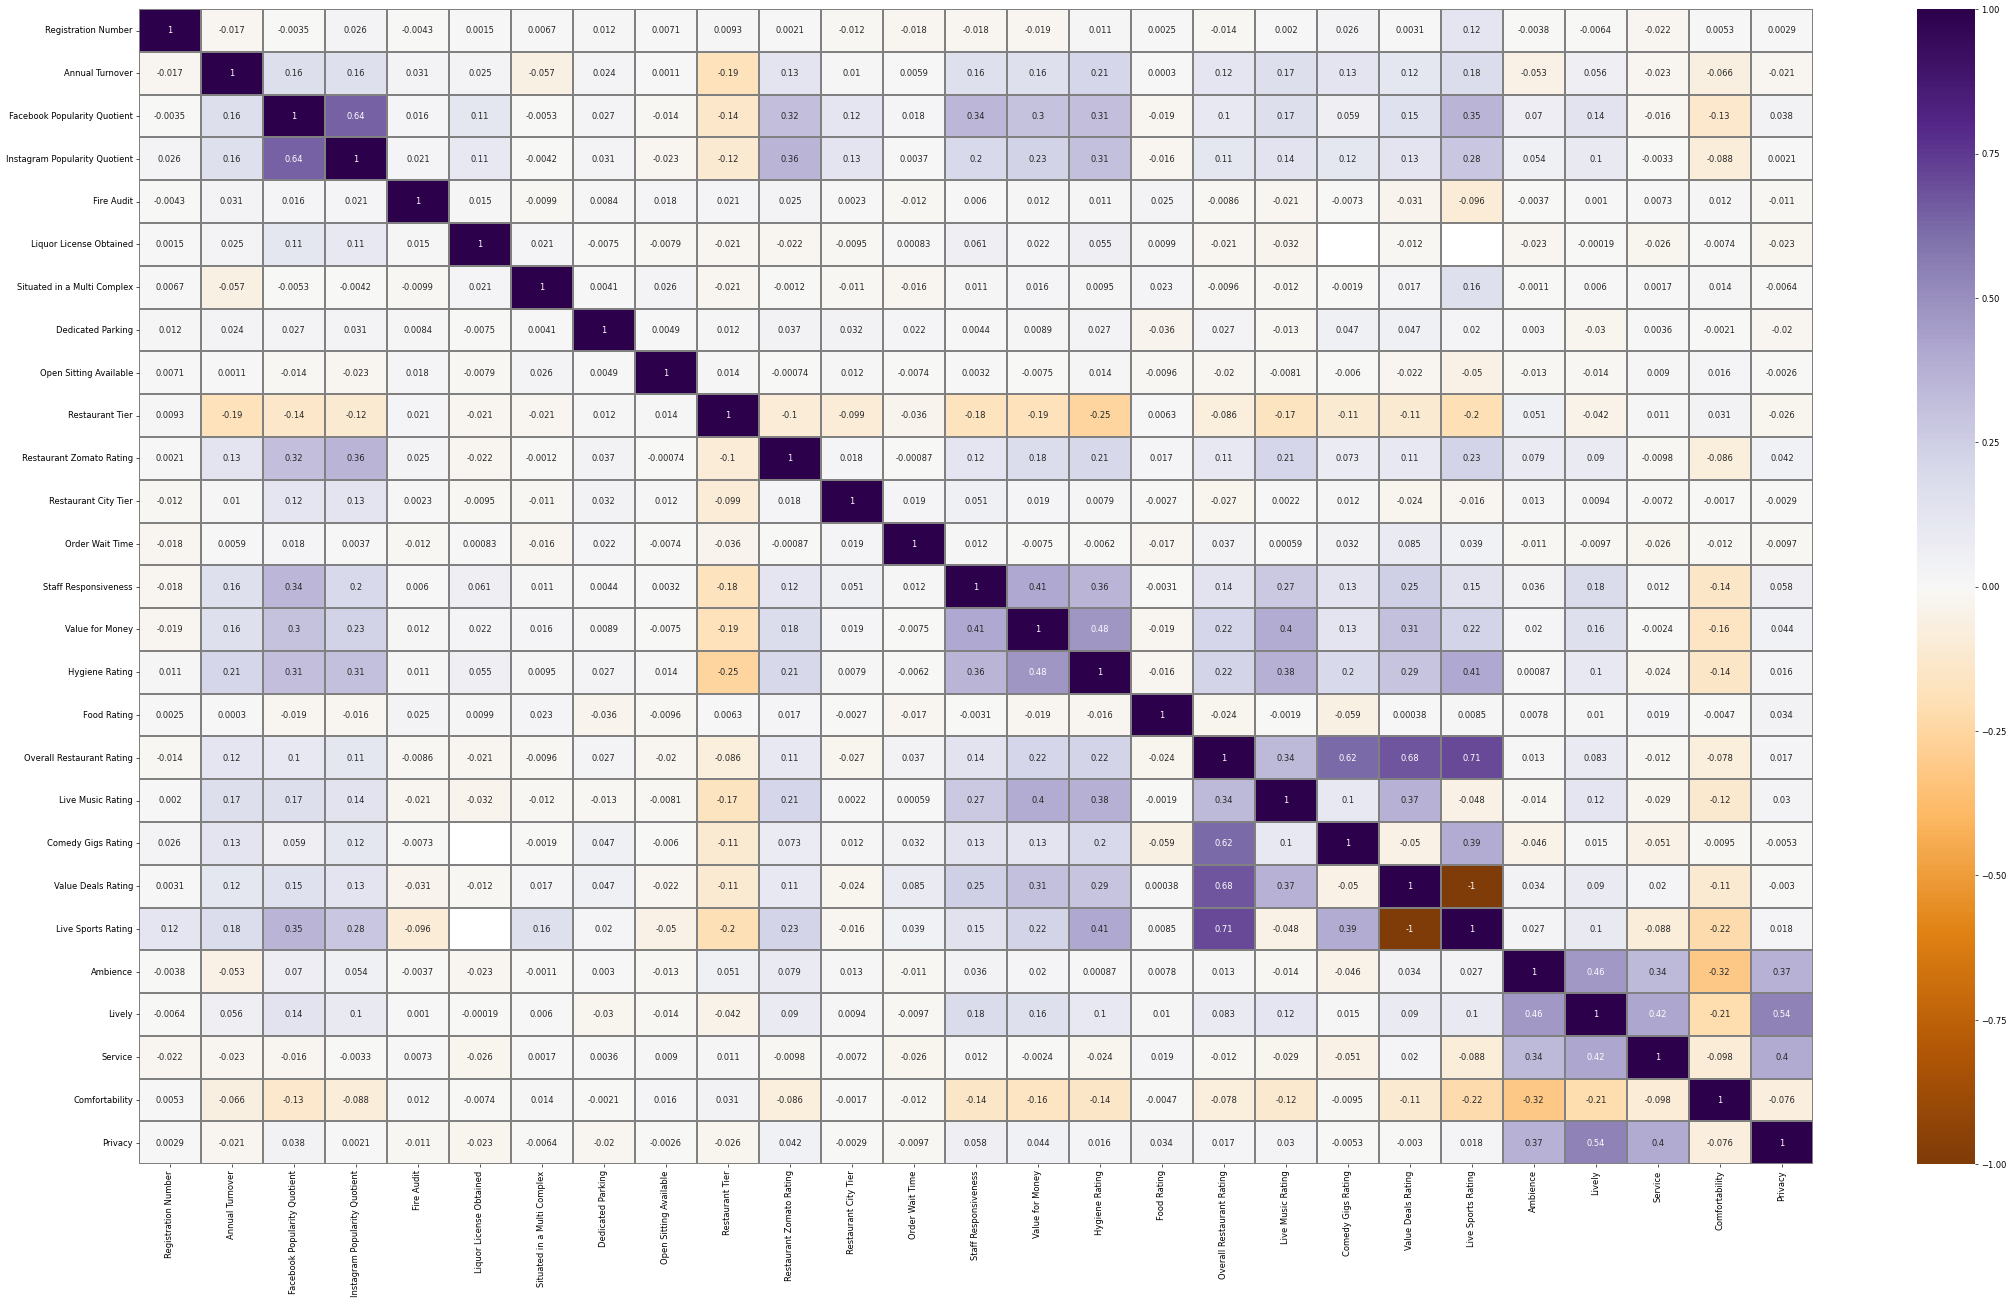

<IPython.core.display.Javascript object>

In [ ]:
dfcorr = df.corr()
plt.figure(figsize=(45,25))
linewidths = .5
linecolor = "gray"
cmap='PuOr'

# plotting the heatmap
hm = sns.heatmap(data=dfcorr,
                linewidths=linewidths,
                linecolor=linecolor,
                cmap=cmap,
                annot=True
                 )

# displaying the plotted heatmap
plt.show()


<Figure size 900x480 with 0 Axes>

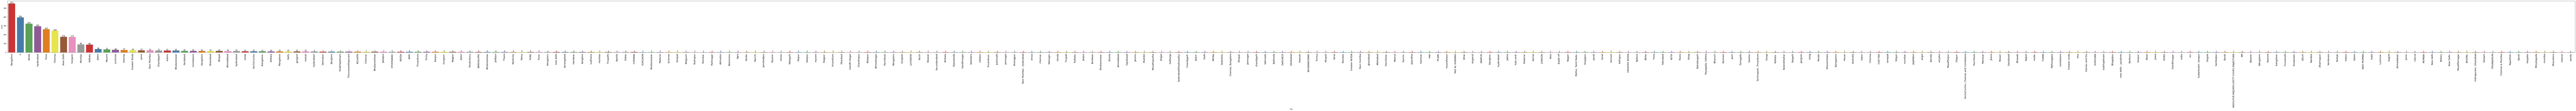

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15,8))
labeled_barplot(df, "City")

- staff responsiveness
- value for money
- Hygiene rating
- Restaurant Tier
- Zomato, facebook, and instagram Rating
- Overall rating
- Live Music
- Comedy
- VAlue deals
- Live sports

In [ ]:
df["City"].describe()

count          3493
unique          297
top       Bangalore
freq            553
Name: City, dtype: object

<IPython.core.display.Javascript object>

In [ ]:
df["City"].head(5)

0    Bangalore
1       Indore
2      Chennai
3      Gurgaon
4      Manesar
Name: City, dtype: object

<IPython.core.display.Javascript object>

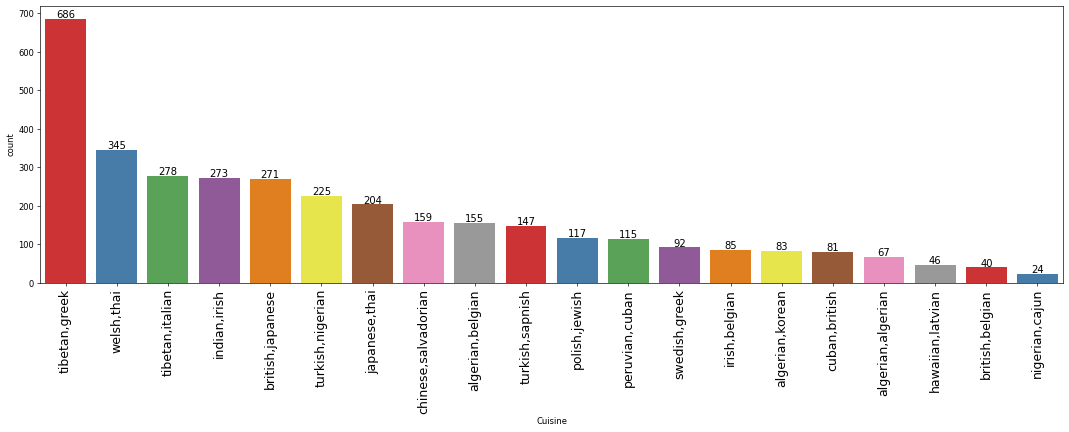

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "Cuisine")

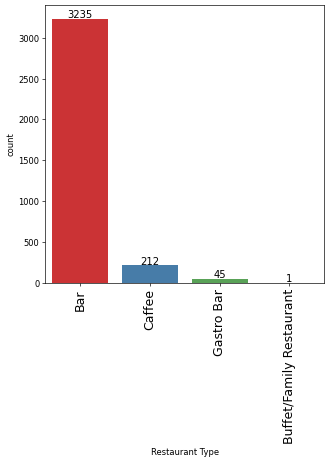

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "Restaurant Type")

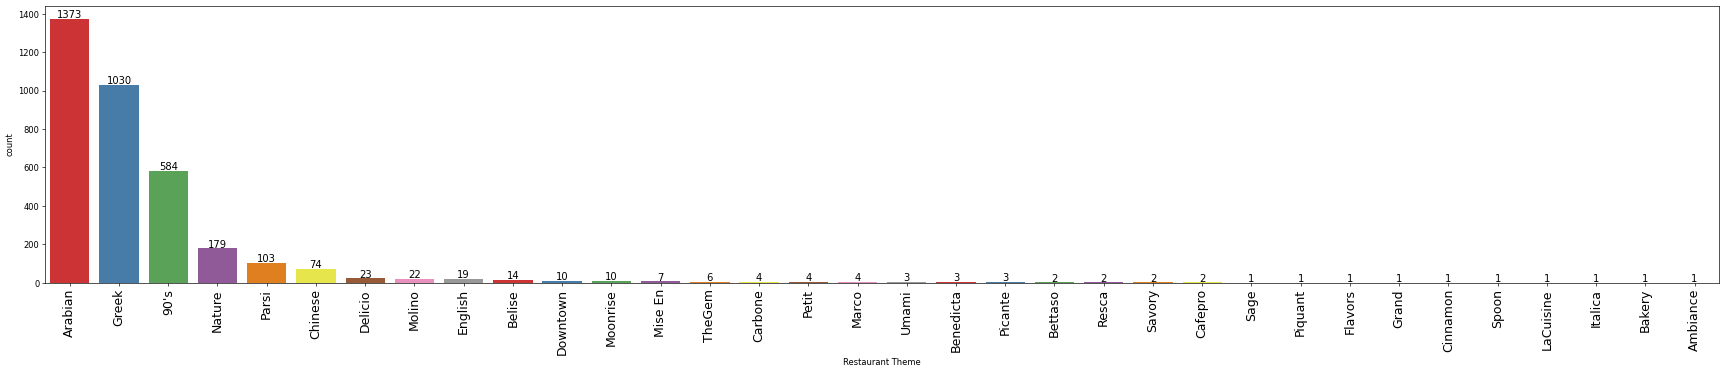

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "Restaurant Theme")

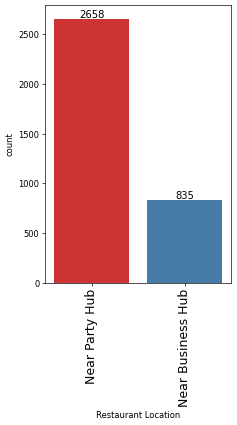

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "Restaurant Location")

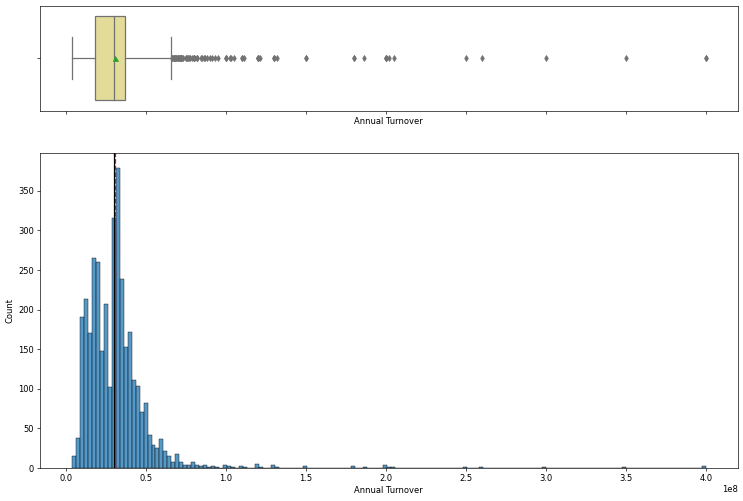

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "Annual Turnover")

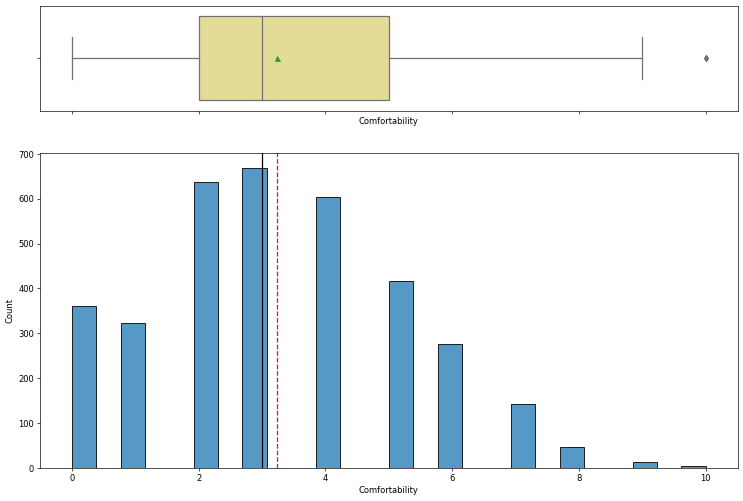

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "Comfortability")

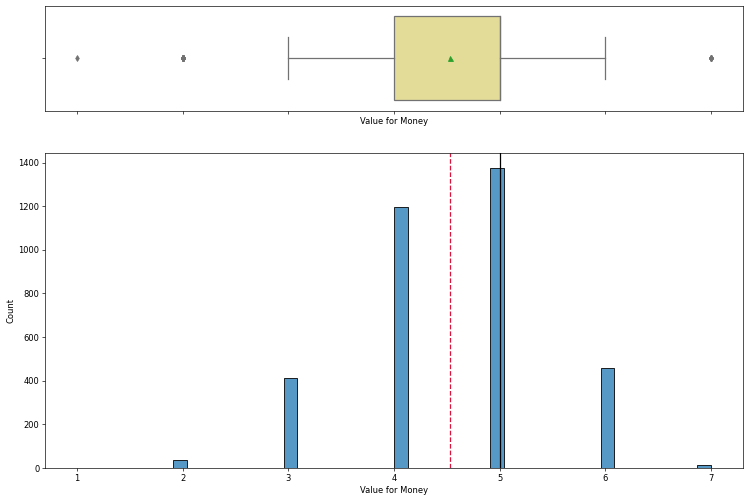

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "Value for Money")

In [ ]:
df.drop(
    [
        "Live Sports Rating",
        "Value Deals Rating",
        "Comedy Gigs Rating",
        "Live Music Rating",
    ],
    axis=1,
    inplace=True
)

<IPython.core.display.Javascript object>

In [ ]:
dftest.drop(
    [
        "Live Sports Rating",
        "Value Deals Rating",
        "Comedy Gigs Rating",
        "Live Music Rating",
    ],
    axis=1,
    inplace=True
)
        

<IPython.core.display.Javascript object>

In [ ]:
df.isnull().sum()

Registration Number                0
Annual Turnover                    0
Cuisine                            0
City                               0
Restaurant Location                0
Opening Day of Restaurant          0
Facebook Popularity Quotient      99
Endorsed By                        0
Instagram Popularity Quotient     56
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Restaurant Tier                   49
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsiveness               0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating        212
Ambience                          25
Lively                             0
S

<IPython.core.display.Javascript object>

In [ ]:
dftest["Overall Restaurant Rating"] = dftest["Overall Restaurant Rating"].fillna(
    value=dftest.groupby(["Restaurant Zomato Rating"])["Overall Restaurant Rating"].transform("median")
)

<IPython.core.display.Javascript object>

In [ ]:
dftest.isnull().sum()

Registration Number              0
Cuisine                          0
City                             0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endoresed By                     0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Restaurant Tier                  0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsiveness             0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Ambience                         0
Lively                           0
Service                          0
Comfortability                   0
Privacy             

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Ambience,Lively,Service,Comfortability,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14/02/09,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29/09/08,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30/07/11,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30/11/08,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22/02/10,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,6,2,4,6


<IPython.core.display.Javascript object>

In [ ]:
df.isnull().sum()

Registration Number                0
Annual Turnover                    0
Cuisine                            0
City                               0
Restaurant Location                0
Opening Day of Restaurant          0
Facebook Popularity Quotient      99
Endorsed By                        0
Instagram Popularity Quotient     56
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Restaurant Tier                   49
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsiveness               0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating        212
Ambience                          25
Lively                             0
S

<IPython.core.display.Javascript object>

In [ ]:
df["Facebook Popularity Quotient"] = df["Facebook Popularity Quotient"].fillna(
    value=df.groupby(["Annual Turnover"])["Facebook Popularity Quotient"].transform("median")
)

df["Instagram Popularity Quotient"] = df["Instagram Popularity Quotient"].fillna(
    value=df.groupby(["Annual Turnover"])["Instagram Popularity Quotient"].transform("median")
)

df["Restaurant Tier"] = df["Restaurant Tier"].fillna(
    value=df.groupby(["Annual Turnover"])["Restaurant Tier"].transform("median")
)

df["Overall Restaurant Rating"] = df["Overall Restaurant Rating"].fillna(
    value=df.groupby(["Annual Turnover"])["Overall Restaurant Rating"].transform("median")
)

df["Ambience"] = df["Ambience"].fillna(
    value=df.groupby(["Annual Turnover"])["Ambience"].transform("median")
)
                  

<IPython.core.display.Javascript object>

In [ ]:
df.isnull().sum()

Registration Number              0
Annual Turnover                  0
Cuisine                          0
City                             0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     1
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Restaurant Tier                  1
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsiveness             0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        3
Ambience                         0
Lively                           0
Service                          0
Comfortability      

<IPython.core.display.Javascript object>

In [ ]:
#Dropping remaining null values
df.dropna(subset=["Overall Restaurant Rating", "Restaurant Tier", "Facebook Popularity Quotient"], inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
df.isnull().sum()

Registration Number              0
Annual Turnover                  0
Cuisine                          0
City                             0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endorsed By                      0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Restaurant Tier                  0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsiveness             0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Ambience                         0
Lively                           0
Service                          0
Comfortability      

<IPython.core.display.Javascript object>

In [ ]:
dftest.isnull().sum()

Registration Number              0
Cuisine                          0
City                             0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endoresed By                     0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Restaurant Tier                  0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsiveness             0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Ambience                         0
Lively                           0
Service                          0
Comfortability                   0
Privacy             

<IPython.core.display.Javascript object>

In [ ]:
#making copies now that there are no missing values
train_cleaned = df.copy()

test_cleaned = dftest.copy()

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(3489, 30)

<IPython.core.display.Javascript object>

In [ ]:
df.dtypes

Registration Number                int64
Annual Turnover                    int64
Cuisine                           object
City                              object
Restaurant Location               object
Opening Day of Restaurant         object
Facebook Popularity Quotient     float64
Endorsed By                       object
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
Situated in a Multi Complex        int64
Dedicated Parking                  int64
Open Sitting Available             int64
Restaurant Tier                  float64
Restaurant Type                   object
Restaurant Theme                  object
Restaurant Zomato Rating           int64
Restaurant City Tier               int64
Order Wait Time                    int64
Staff Responsiveness               int64
Value for Money                    int64
Hygiene Rating                     int64
Food Rating                        int64
Overall Restaura

<IPython.core.display.Javascript object>

In [ ]:
dftest.dtypes

Registration Number                int64
Cuisine                           object
City                              object
Restaurant Location               object
Opening Day of Restaurant         object
Facebook Popularity Quotient     float64
Endoresed By                      object
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
Situated in a Multi Complex        int64
Dedicated Parking                  int64
Open Sitting Available             int64
Restaurant Tier                    int64
Restaurant Type                   object
Restaurant Theme                  object
Restaurant Zomato Rating           int64
Restaurant City Tier               int64
Order Wait Time                    int64
Staff Responsiveness               int64
Value for Money                    int64
Hygiene Rating                     int64
Food Rating                        int64
Overall Restaurant Rating        float64
Ambience        

<IPython.core.display.Javascript object>

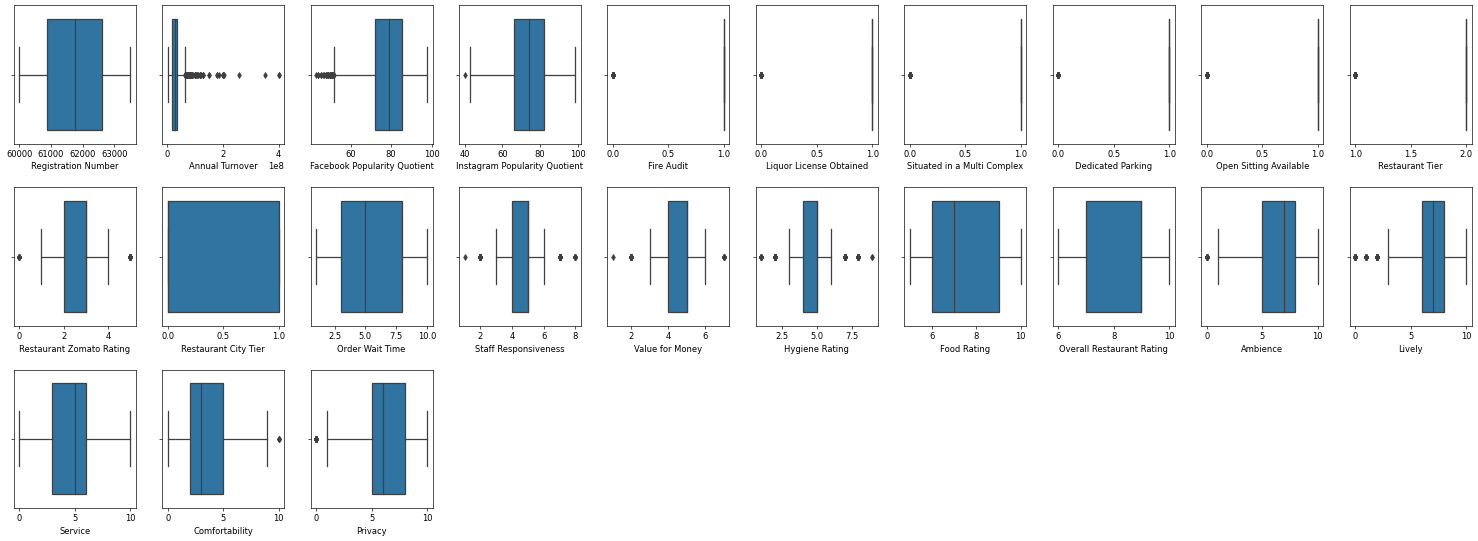

<IPython.core.display.Javascript object>

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(25, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 10, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

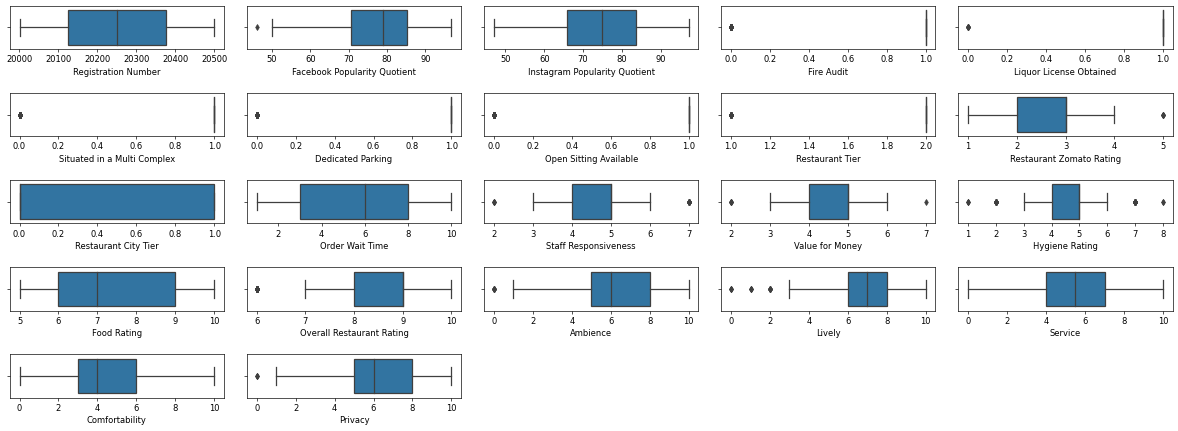

<IPython.core.display.Javascript object>

In [ ]:
num_test_cols = dftest.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 10))

for i, variable in enumerate(num_test_cols):
    plt.subplot(7, 5, i + 1)
    sns.boxplot(data=dftest, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [ ]:
object_train = df.select_dtypes(
    include="object"
).columns.tolist()  # creates list of all object type columns
df[object_train] = df.select_dtypes(include="object").astype(
    "category"
)  # changes all object type columns to categorical

<IPython.core.display.Javascript object>

In [ ]:
df.dtypes

Registration Number                 int64
Annual Turnover                     int64
Cuisine                          category
City                             category
Restaurant Location              category
Opening Day of Restaurant        category
Facebook Popularity Quotient      float64
Endorsed By                      category
Instagram Popularity Quotient     float64
Fire Audit                          int64
Liquor License Obtained             int64
Situated in a Multi Complex         int64
Dedicated Parking                   int64
Open Sitting Available              int64
Restaurant Tier                   float64
Restaurant Type                  category
Restaurant Theme                 category
Restaurant Zomato Rating            int64
Restaurant City Tier                int64
Order Wait Time                     int64
Staff Responsiveness                int64
Value for Money                     int64
Hygiene Rating                      int64
Food Rating                       

<IPython.core.display.Javascript object>

In [ ]:
dftest.dtypes

Registration Number                int64
Cuisine                           object
City                              object
Restaurant Location               object
Opening Day of Restaurant         object
Facebook Popularity Quotient     float64
Endoresed By                      object
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
Situated in a Multi Complex        int64
Dedicated Parking                  int64
Open Sitting Available             int64
Restaurant Tier                    int64
Restaurant Type                   object
Restaurant Theme                  object
Restaurant Zomato Rating           int64
Restaurant City Tier               int64
Order Wait Time                    int64
Staff Responsiveness               int64
Value for Money                    int64
Hygiene Rating                     int64
Food Rating                        int64
Overall Restaurant Rating        float64
Ambience        

<IPython.core.display.Javascript object>

In [ ]:
object_test = dftest.select_dtypes(
    include="object"
).columns.tolist()  # creates list of all object type columns
dftest[object_test] = dftest.select_dtypes(include="object").astype(
    "category"
)  # changes all object type columns to categorical

<IPython.core.display.Javascript object>

In [ ]:
dftest.dtypes

Registration Number                 int64
Cuisine                          category
City                             category
Restaurant Location              category
Opening Day of Restaurant        category
Facebook Popularity Quotient      float64
Endoresed By                     category
Instagram Popularity Quotient     float64
Fire Audit                          int64
Liquor License Obtained             int64
Situated in a Multi Complex         int64
Dedicated Parking                   int64
Open Sitting Available              int64
Restaurant Tier                     int64
Restaurant Type                  category
Restaurant Theme                 category
Restaurant Zomato Rating            int64
Restaurant City Tier                int64
Order Wait Time                     int64
Staff Responsiveness                int64
Value for Money                     int64
Hygiene Rating                      int64
Food Rating                         int64
Overall Restaurant Rating         

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(3489, 30)

<IPython.core.display.Javascript object>

In [ ]:
dftest.shape

(500, 29)

<IPython.core.display.Javascript object>

In [ ]:
#categorical data
categorical_cols = ['Cuisine',
                    'City',
                    'Restaurant Location',
                    'Endorsed By',
                    'Restaurant Type',
                    'Restaurant Theme',
                    ] 

#import pandas as pd
df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(3489, 378)

<IPython.core.display.Javascript object>

In [ ]:
df

,Registration Number,Annual Turnover,Opening Day of Restaurant,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Ambience,Lively,Service,Comfortability,Privacy,"Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",City_ Delhi,City_ Pune,City_ ariyalur,City_ mumbai,City_-1,City_AM,City_Agra,City_Ahmedabad,City_Ahmedabad,City_Ahmednagar,City_Allahabad,City_Alwar,City_Ambala,City_Asansol,City_Aurangabad,City_Australia,City_BANGALORE,City_BAngalore,City_BHOPAL,City_BHUBANESWAR,City_Baddi HP,City_Bahadurgarh,City_Banagalore,City_Bangalore,City_Bangalore,City_Banglore,City_Banglore,City_Bankura,City_Bareli,City_Baroda,City_Bathinda,City_Beawar,City_Belgaum,City_Bellary,City_Bengaluru,City_Bhagalpur,City_Bharuch,City_Bhilai,City_Bhiwadi,City_Bhopal,City_Bhopal,City_Bhubaneshwar,City_Bhubaneswar,City_Bhubaneswar,City_Bhubneshwar,City_Bikaner,City_Bilaspur,City_Bulandshahar,City_Bundi,City_Burdwan,City_CHENNAI,City_CHEYYAR,City_Calicut,City_Chandigarh,City_Chandigarh,City_Chandrapur,City_Chennai,City_Chennai,City_Chennai & Mumbai,"City_Chennai, Bangalore",City_Coimbatore,City_DELHI,City_Daman and Diu,City_Dehradun,City_Delhi,City_Delhi/NCR,City_Dhanbad,City_Dharamshala,City_Dharmapuri,City_Dharuhera,City_Dubai,City_Durgapur,City_Ernakulam,City_Faridabad,City_GREATER NOIDA,City_GURGAON,City_GURGOAN,City_Gagret,City_Gajiabaad,City_Gandhi Nagar,City_Gandhinagar,City_Gandhinagar,City_Ganjam,City_Gaziabaad,City_Ghaziabad,City_Gonda,City_Greater NOIDA,City_Greater Noida,City_Greater noida,City_Gulbarga,City_Gurga,City_Gurgaon,City_Gurgaon,City_Gurgoan,City_Gwalior,City_HYDERABAD,City_Haridwar,City_Hissar,City_Hospete,City_Howrah,City_Hubli,City_Hyderabad,City_Hyderabad,"City_Indirapuram, Ghaziabad",City_Indore,City_Jabalpur,City_Jagdalpur,City_Jaipur,City_Jaipur,City_Jalandhar,City_Jammu,City_Jamnagar,City_Jamshedpur,City_Jaspur,City_Jhajjar,City_Jhansi,City_Jodhpur,City_Joshimath,City_Jowai,City_KANPUR,City_KOLKATA,City_KOTA,City_Kanpur,City_Kanpur,City_Karnal,City_Khopoli,City_Kochi,City_Kochi/Cochin,"City_Kochi/Cochin, Chennai and Coimbatore",City_Kolkata,City_Kolkata,City_Kolkata`,City_Kota,City_Kurnool,City_LONDON,City_LUCKNOW,City_Lucknow,City_Lucknow,City_Ludhiana,City_MUMBAI,City_Madurai,City_Madurai,City_Maharajganj,City_Manesar,City_Mangalore,City_Meerut,"City_Mettur, Tamil Nadu",City_Miryalaguda,City_Mumbai,City_Mumbai,City_Muvattupuzha,City_Muzaffarnagar,City_Muzaffarpur,City_Mysore,City_Mysore,City_NAVI MUMBAI,City_NOIDA,City_Nagari,City_Nagpur,City_Nagpur,City_Nalagarh,City_Nanded,City_Nashik,City_Nasikcity,City_Navi Mumbai,"City_Navi Mumbai , Hyderabad",City_Navi mumbai,City_Neemrana,City_Nellore,City_New Delhi,City_New Delhi,City_New delhi,City_Noida,City_Noida,City_Nouda,City_Ongole,City_PATNA,City_PILANI,City_PUNE,City_Panchkula,City_Panchkula,City_Pantnagar,City_Patna,City_Pondicherry,City_Punchkula,City_Pune,City_Pune,City_RAS AL KHAIMAH,City_Raigarh,City_Raipur,City_Rajasthan,City_Rajkot,City_Ranchi,City_Ranchi,City_Ratnagiri,"City_Rayagada, Odisha",City_Rewari,City_Rohtak,City_Roorkee,City_Rudrapur,"City_SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN",City_SHAHDOL,City_Sahibabad,City_Salem,City_Sambalpur,City_Secunderabad,City_Shahdol,City_Shimla,City_Siliguri,City_Siliguri,City_Sonipat,City_Surat,City_THANE,City_TRIVANDRUM,"City_Tech

<IPython.core.display.Javascript object>

In [ ]:
df.isnull().sum().any()


False

<IPython.core.display.Javascript object>

In [ ]:
dftest.isnull().sum().any()


False

<IPython.core.display.Javascript object>

In [ ]:
dftest.isnull().sum()

Registration Number              0
Cuisine                          0
City                             0
Restaurant Location              0
Opening Day of Restaurant        0
Facebook Popularity Quotient     0
Endoresed By                     0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
Situated in a Multi Complex      0
Dedicated Parking                0
Open Sitting Available           0
Restaurant Tier                  0
Restaurant Type                  0
Restaurant Theme                 0
Restaurant Zomato Rating         0
Restaurant City Tier             0
Order Wait Time                  0
Staff Responsiveness             0
Value for Money                  0
Hygiene Rating                   0
Food Rating                      0
Overall Restaurant Rating        0
Ambience                         0
Lively                           0
Service                          0
Comfortability                   0
Privacy             

<IPython.core.display.Javascript object>

In [ ]:
#categorical data
categorical_cols = ['Cuisine',
                    'City',
                    'Restaurant Location',
                    'Restaurant Type',
                    'Restaurant Theme',
                    ] 

#import pandas as pd
dftest = pd.get_dummies(dftest, columns = categorical_cols, drop_first=True)

<IPython.core.display.Javascript object>

In [ ]:
df.shape



(3489, 378)

<IPython.core.display.Javascript object>

In [ ]:
dftest.shape

(500, 160)

<IPython.core.display.Javascript object>

In [ ]:
train = df.copy()
test =  dftest.copy()

<IPython.core.display.Javascript object>

In [ ]:
x_train = train.copy()
for col in train:
    if col not in test.columns:
        x_train.drop(col, axis=1, inplace=True)# takes away all columns in the training dataset that do not exist in the testing data set
for col in test:
    if col not in x_train.columns:
        test.drop(col, axis=1, inplace=True)# takes away all columns in the testing dataset that do not exist in the training data set
print("New train size ", x_train.shape)
print("New test size ",test.shape)

New train size  (3489, 122)
New test size  (500, 122)


<IPython.core.display.Javascript object>

In [ ]:



x_train.drop("Restaurant Type_Buffet/Family Restaurant", axis=1, inplace=True)

test_pred = test.copy()
test_pred.drop("Registration Number", axis=1, inplace=True)
test_pred.drop("City_-1", axis=1, inplace=True)

test_pred.drop("Restaurant Type_Buffet/Family Restaurant", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
# sets y_train as the Annual Turnover column
y_train = train["Annual Turnover"]

<IPython.core.display.Javascript object>

In [ ]:
import statsmodels.api as sm
olsmod = sm.OLS(y_train, x_train).fit()
print(olsmod.summary())  # shows summary of model

                                 OLS Regression Results                                
Dep. Variable:        Annual Turnover   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              78.34
Date:                Sun, 13 Nov 2022   Prob (F-statistic):                        0.00
Time:                        11:59:19   Log-Likelihood:                         -63431.
No. Observations:                3489   AIC:                                  1.271e+05
Df Residuals:                    3370   BIC:                                  1.278e+05
Df Model:                         119                                                  
Covariance Type:            nonrobust                                                  
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.linear_model import LinearRegression
linearregression = (
    LinearRegression()
)  # sets empty linear regression model as linearregression

linearregression.fit(
    x_train, y_train
)  # fits the linearregression model with the training data

LinearRegression()

<IPython.core.display.Javascript object>

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [ ]:
# checking model performance on train set (seen 70% data)
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.900839e+07,1.050729e+07,0.160617,0.130969,44.940382


<IPython.core.display.Javascript object>

In [ ]:
rmse_beginning = np.sqrt(mean_squared_error(y_train, linearregression.predict(x_train)))
rmse_end = rmse_beginning
x_train1 = x_train.copy()

for col in x_train:
     x_train1.drop(col, axis=1, inplace=True)
     linearregression1 = (
         LinearRegression()
     )  # sets empty linear regression model as linearregression

     linearregression1.fit(
         x_train1, y_train
     )  # fits the linearregression model with the training data
     rmse_middle = np.sqrt(
         mean_squared_error(y_train, linearregression1.predict(x_train1))
     )
     if rmse_middle < rmse_end:
         rmse_end = rmse_middle
         x_train.drop(col, axis=1, inplace=True)
         print("drop column ", col)
     else:
         x_train1 = x_train.copy()
print("New adjusted RMSE = ", rmse_end)

New adjusted RMSE =  19008389.07837371
Error in callback <bound method BlackFormatter.format_cell of <lab_black.BlackFormatter object at 0x0000024E4D94D450>> (for post_run_cell):


KeyError: '_i279'

In [ ]:
linearregression = (
     LinearRegression()
 )  # sets empty linear regression model as linearregression

linearregression.fit(
     x_train, y_train
 )  # fits the linearregression model with the training data

LinearRegression()

<IPython.core.display.Javascript object>

In [ ]:
#checking model performance on train set (seen 70% data)
linearregression_train_perf = model_performance_regression(
     linearregression, x_train, y_train
 )
linearregression_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.900839e+07,1.050729e+07,0.160617,0.130969,44.940382


ERROR:root:Cannot parse: 5:0:  linearregression_train_perf
Traceback (most recent call last):
  File "C:\Users\watte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "C:\Users\watte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "src\black\__init__.py", line 1067, in format_str
  File "src\black\__init__.py", line 1077, in _format_str_once
  File "src\black\parsing.py", line 126, in lib2to3_parse
black.parsing.InvalidInput: Cannot parse: 5:0:  linearregression_train_perf


In [ ]:
for col in test_pred:
   if col not in x_train.columns:
        test_pred.drop(
            col, axis=1, inplace=True
        )  # takes away all columns in the testing dataset that do not exist in the training data set
print("New train size ", x_train.shape)
print("New test size ", test_pred.shape)

New train size  (3489, 119)
New test size  (500, 119)


<IPython.core.display.Javascript object>

In [ ]:
test.head()

,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Tier,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsiveness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Ambience,Lively,Service,Comfortability,Privacy,"Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_nigerian,cajun","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",City_-1,City_Ahmedabad,City_Bangalore,City_Bangalore,City_Banglore,City_Bhopal,City_Bhubaneshwar,City_Bhubaneswar,City_Bilaspur,City_CHENNAI,City_Chandigarh,City_Chennai,City_Coimbatore,City_DELHI,City_Dehradun,City_Delhi,City_Faridabad,City_Greater Noida,City_Gurgaon,City_Gurgaon,City_Hissar,City_Hubli,City_Hyderabad,City_Hyderabad,City_Indore,City_Jaipur,City_Jodhpur,City_Kanpur,City_Kochi/Cochin,City_Kolkata,City_Lucknow,City_Madurai,City_Mangalore,City_Meerut,City_Mumbai,City_Mysore,City_Nagpur,City_Navi Mumbai,City_New Delhi,City_New Delhi,City_Noida,City_Ongole,City_Pondicherry,City_Pune,City_Pune,City_Raipur,City_Rajkot,City_Rudrapur,City_Secunderabad,City_Thane,City_Trivandrum,City_bangalore,City_bhubaneswar,City_hyderabad,City_kolkata,City_mohali,City_mumbai,City_new delhi,City_patna,City_pune,Restaurant Location_Near Party Hub,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar,Restaurant Theme_Ambiance,Restaurant Theme_Arabian,Restaurant Theme_Belise,Restaurant Theme_Benedicta,Restaurant Theme_Carbone,Restaurant Theme_Chinese,Restaurant Theme_Delicio,Restaurant Theme_English,Restaurant Theme_Greek,Restaurant Theme_Marco,Restaurant Theme_Mise En,Restaurant Theme_Molino,Restaurant Theme_Moonrise,Restaurant Theme_Nature,Restaurant Theme_Parsi,Restaurant Theme_Petit,Restaurant Theme_Picante
0,20001,78.00,69.00,1,1,1,1,0,2,3,0,10,5,3,5,8,6.0,5,2,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,20002,89.17,96.00,1,1,1,1,1,2,4,0,10,4,5,6,8,9.0,7,8,5,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,20003,84.00,86.00,1,1,1,0,1,2,2,0,6,5,5,6,9,6.0,9,7,5,1,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,20004,79.38,74.40,0,1,1,1,1,2,3,0,10,5,5,5,9,9.0,6,7,6,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20005,84.67,86.46,1,1,1,0,0,1,4,1,7,5,5,7,8,9.0,4,4,7,7,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [ ]:
# creates dataframe to be exports per the submissions requirements
results = pd.DataFrame(columns=["Registration Number", "Annual Turnover"], dtype=int)

for row in test.iterrows():
    results = results.append(
        {"Registration Number": row[1]["Registration Number"]}, ignore_index=True
    )  # sets all registration numbers in test

for i, pred in enumerate(linearregression.predict(test_pred)):
    results["Annual Turnover"].iloc[
        i
    ] = pred  # places all corresponding predicted Annual Turnover values per Registration Number

results = results.astype(
    int
)  # sets all values of Registration Number and Annual Turnover as integers

results.set_index(
    "Registration Number", inplace=True
)  # set Registration Number as the first column in the dataframe
print(results.shape)
results

(500, 1)


,Annual Turnover
Registration Number,
20001,26478830
20002,40261549
20003,27194224
20004,33109192
20005,44725160
...,...
20496,32215224
20497,25717124
20498,43354235


<IPython.core.display.Javascript object>

In [ ]:
# exports the data frame as a csv file
results.to_csv("WalterEfird_submission_AnnualTurnover.csv")

<IPython.core.display.Javascript object>